# Template matching with a single template

Templates are selected from Weiqiang Zhu's PhaseNet catalog.

In [2]:
import os
import fast_matched_filter as fmf
import glob
import numpy as np
import matplotlib.pyplot as plt
import obspy as obs
import pandas as pd


In [3]:
# path variables and file names
DIR_WAVEFORMS = "/data/hy4/ebeauce/Ridgecrest/2019/"
DIR_CATALOG = "../picks_phasenet/"

STATION_FILE = "adloc_stations.csv"
EVENT_FILE = "adloc_events.csv"
PICK_FILE = "adloc_picks.csv"

## Load PhaseNet catalog

Here, we read the catalog of the 2019 Ridgecrest sequence made with PhaseNet. Information is divided into three files:
- a station metadata file,
- an event metadata file (the catalog per se),
- a pick database, which contains all the P- and S-wave picks found by PhaseNet.

In [4]:
station_meta = pd.read_csv(os.path.join(DIR_CATALOG, STATION_FILE))
station_meta

,network,station,location,instrument,component,latitude,longitude,elevation_m,depth_km,provider,station_id,station_term_time_p,station_term_time_s,station_term_amplitude
0,CI,CCC,NaN,BH,ENZ,35.524950,-117.364530,670.0,-0.6700,SCEDC,CI.CCC..BH,0.266086,0.500831,0.049399
1,CI,CCC,NaN,HH,ENZ,35.524950,-117.364530,670.0,-0.6700,SCEDC,CI.CCC..HH,0.295428,0.518465,0.191475
2,CI,CCC,NaN,HN,ENZ,35.524950,-117.364530,670.0,-0.6700,SCEDC,CI.CCC..HN,0.296263,0.541148,0.064485
3,CI,CLC,NaN,BH,ENZ,35.815740,-117.597510,775.0,-0.7750,SCEDC,CI.CLC..BH,-0.231963,-0.415271,-0.331371
4,CI,CLC,NaN,HH,ENZ,35.815740,-117.597510,775.0,-0.7750,SCEDC,CI.CLC..HH,-0.168743,-0.390045,-0.140313
5,CI,CLC,NaN,HN,ENZ,35.815740,-117.597510,775.0,-0.7750,SCEDC,CI.CLC..HN,-0.175671,-0.388116,-0.249066
6,CI,DTP,NaN,BH,ENZ,35.267420,-117.845810,908.0,-0.9080,SCEDC,CI.DTP..BH,-0.305881,-0.602459,-0.503411
7,CI,DTP,NaN,HH,ENZ,35.267420,-117.845810,908.0,-0.9080,SCEDC,CI.DTP..HH,-0.263705,-0.564867,-0.437951
8,CI,DTP,NaN,HN,ENZ,35.267420,-117.845810,908.0,-0.9080,SCEDC,CI.DTP..HN,-0.244383,-0.538990,-0.500516
9,CI,JRC2,NaN,BH,ENZ,35.982490,-117.808850,1469.0,-1.4690,SCEDC,CI.JRC2..BH,0.011361,-0.080285,-0.039941


The following shows a very rudimentary map of the station network. Look into the `cartopy` package for more sophisticated maps.

Text(0.5, 1.0, 'Stations used to build the PhaseNet catalog')

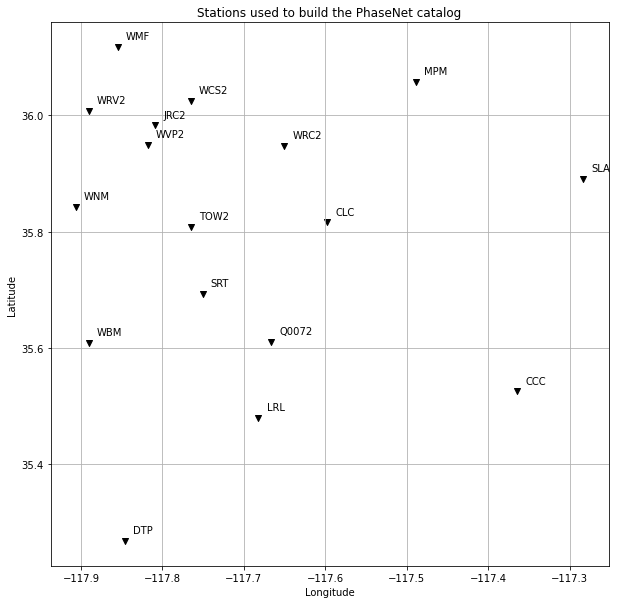

In [5]:
_station_meta = station_meta.drop_duplicates("station")

fig, ax = plt.subplots(num="station_network", figsize=(10, 10))
ax.scatter(_station_meta["longitude"], _station_meta["latitude"], marker="v", color="k")
for idx, row in _station_meta.iterrows():
    ax.text(row.longitude + 0.01, row.latitude + 0.01, row.station, va="bottom", ha="left")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid()
ax.set_title("Stations used to build the PhaseNet catalog")

In [6]:
event_meta = pd.read_csv(os.path.join(DIR_CATALOG, EVENT_FILE))
event_meta

,time,adloc_score,adloc_residual_time,num_picks,magnitude,adloc_residual_amplitude,event_index,longitude,latitude,depth_km
0,2019-07-04 00:46:47.342963596,0.866596,0.057355,35,0.595368,0.165480,6720,-117.882570,36.091088,4.643969
1,2019-07-04 00:55:32.648412579,0.781116,0.203567,16,1.142510,0.170509,17122,-117.799226,35.378160,11.078458
2,2019-07-04 00:56:37.232733104,0.908073,0.086183,42,0.912494,0.166681,5411,-117.880902,36.091986,4.854336
3,2019-07-04 02:00:39.149363202,0.814322,0.036164,15,0.209530,0.092534,17868,-117.866468,36.093520,4.981447
4,2019-07-04 03:05:31.018885833,0.799281,0.080708,11,0.104050,0.156833,25037,-117.846320,36.100386,5.943363
...,...,...,...,...,...,...,...,...,...,...
20898,2019-07-09 23:58:14.298499048,0.933013,0.097816,67,1.543257,0.131523,1907,-117.711811,35.926468,6.652020
20899,2019-07-09 23:58:47.701746285,0.882434,0.090185,73,1.087089,0.140159,2051,-117.604263,35.797450,6.617413
20900,2019-07-09 23:59:05.102247662,0.798047,0.435077,26,1.147040,0.170994,12567,-117.509729,35.692722,12.815041
20901,2019-07-09 23:59:40.257837813,0.971081,0.065523,35,1.161323,0.068586,7726,-117.846289,36.061435,5.224666


In [7]:
picks = pd.read_csv(os.path.join(DIR_CATALOG, PICK_FILE))
picks

,station_id,phase_index,phase_time,phase_score,phase_type,dt_s,phase_polarity,phase_amplitude,event_index,sp_ratio,event_amplitude,adloc_mask,adloc_residual_time,adloc_residual_amplitude
0,CI.WMF..BH,280874,2019-07-04 00:46:48.759,0.594,P,0.01,0.110,-3.213107,6720,0.955091,3.124152e-07,1,0.003919,0.012320
1,CI.WMF..HH,280881,2019-07-04 00:46:48.818,0.973,P,0.01,0.938,-3.077638,6720,0.948896,3.368390e-07,1,0.026491,0.063669
2,CI.WMF..HN,280881,2019-07-04 00:46:48.818,0.973,P,0.01,0.898,-3.128019,6720,1.598008,2.146277e-07,1,0.017580,0.173702
3,CI.WRV2..EH,280945,2019-07-04 00:46:49.450,0.977,P,0.01,-0.855,-3.464453,6720,1.000000,3.298200e-07,1,0.077194,0.244381
4,CI.WRV2..HN,280945,2019-07-04 00:46:49.450,0.941,P,0.01,-0.906,-3.585863,6720,1.147235,3.908305e-07,1,0.056694,0.041691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955700,CI.WRV2..HN,8639355,2019-07-09 23:59:53.550,0.688,S,0.01,-0.022,-3.384471,18566,0.644492,1.973834e-06,1,0.019093,0.028409
955701,CI.JRC2..HH,8639499,2019-07-09 23:59:54.998,0.402,S,0.01,-0.023,-3.446238,18566,0.647843,6.197256e-06,1,0.020364,-0.154404
955702,CI.JRC2..HN,8639499,2019-07-09 23:59:54.998,0.344,S,0.01,-0.016,-3.531800,18566,0.731796,4.075353e-06,1,0.012773,-0.164659
955703,CI.WVP2..EH,8639574,2019-07-09 23:59:55.740,0.314,S,0.01,-0.103,-3.488117,18566,0.636005,2.815148e-06,1,-0.092233,0.316712


## Pick one event

Let's use the PhaseNet catalog to read the waveforms of an event.

In [8]:
def fetch_event_waveforms(
    event_picks,
    folder="preprocessed_2_12",
    dir_waveforms=DIR_WAVEFORMS,
    time_before_phase_onset_sec=2.0,
    duration_sec=10.0
    ):
    """
    Fetches the waveforms for a given event based on the picks.

    Parameters
    ----------
    event_picks : pandas.DataFrame
        DataFrame containing the picks for the event.
    folder : str, optional
        Folder name where the preprocessed waveforms are stored, by default "preprocessed_2_12".
    dir_waveforms : str, optional
        Directory where the waveform data is stored, by default DIR_WAVEFORMS.
    time_before_phase_onset_sec : float, optional
        Time in seconds to start the waveform before the phase onset, by default 2.0.
    duration_sec : float, optional
        Duration in seconds of the waveform to fetch, by default 10.0.

    Returns
    -------
    obspy.Stream
        Stream object containing the fetched waveforms.
    """
    date = pd.Timestamp(event_picks.iloc[0]["phase_time"]).strftime("%Y-%m-%d")
    # full path to waveform directory for this given day
    dir_data = os.path.join(dir_waveforms, date.replace("-", ""), folder)
    stream = obs.Stream()
    for _, pick in event_picks.iterrows():
        # check whether we have a miniseed file for this waveform
        if pick.phase_type == "P":
            files = glob.glob(os.path.join(dir_data, pick.station_id + "Z*mseed"))
        elif pick.phase_type == "S":
            files = glob.glob(os.path.join(dir_data, pick.station_id + "[N,E]*mseed"))
        starttime = obs.UTCDateTime(pick.phase_time) - time_before_phase_onset_sec
        endtime = starttime + duration_sec
        for _file in files:
            stream += obs.read(
                _file,
                starttime=starttime,
                endtime=endtime
            )
    return stream
    

In [9]:
# explore event_meta to find a nice intermediate-size earthquake we could plot
event_meta.head(20)

,time,adloc_score,adloc_residual_time,num_picks,magnitude,adloc_residual_amplitude,event_index,longitude,latitude,depth_km
0,2019-07-04 00:46:47.342963596,0.866596,0.057355,35,0.595368,0.165480,6720,-117.882570,36.091088,4.643969
1,2019-07-04 00:55:32.648412579,0.781116,0.203567,16,1.142510,0.170509,17122,-117.799226,35.378160,11.078458
2,2019-07-04 00:56:37.232733104,0.908073,0.086183,42,0.912494,0.166681,5411,-117.880902,36.091986,4.854336
3,2019-07-04 02:00:39.149363202,0.814322,0.036164,15,0.209530,0.092534,17868,-117.866468,36.093520,4.981447
4,2019-07-04 03:05:31.018885833,0.799281,0.080708,11,0.104050,0.156833,25037,-117.846320,36.100386,5.943363
5,2019-07-04 03:20:28.674438914,0.755451,0.050436,44,0.869927,0.111885,6929,-117.673684,36.114308,5.894466
6,2019-07-04 04:03:01.619369274,0.897311,0.143631,32,0.386310,0.214381,7607,-117.805077,36.016063,0.396071
7,2019-07-04 05:16:47.223353119,0.835094,0.053522,22,0.575433,0.163675,13098,-117.879256,36.090409,4.268292
8,2019-07-04 06:57:32.758991812,0.922386,0.065846,23,0.256281,0.065212,15698,-117.867587,36.081665,5.939931
9,2019-07-04 11:51:07.805591259,0.692042,0.075023,48,0.818316,0.102087,4380,-117.671909,36.118573,6.085804


In [10]:
# feel free to play with the event index to plot different events
EVENT_IDX = 1101

event_meta.set_index("event_index").loc[EVENT_IDX]

time                        2019-07-04 17:02:55.057058245
adloc_score                                      0.770696
adloc_residual_time                              0.079675
num_picks                                              90
magnitude                                        4.476724
adloc_residual_amplitude                         0.143489
longitude                                     -117.495094
latitude                                        35.711607
depth_km                                        13.586411
Name: 1101, dtype: object

In [11]:
# fetch the corresponding picks for this event
event_picks = picks[picks["event_index"] == EVENT_IDX]
event_picks

,station_id,phase_index,phase_time,phase_score,phase_type,dt_s,phase_polarity,phase_amplitude,event_index,sp_ratio,event_amplitude,adloc_mask,adloc_residual_time,adloc_residual_amplitude
565,CI.CLC..HN,6137848,2019-07-04 17:02:58.488,0.969,P,0.01,-0.879,-0.511873,1101,1.017569,2.474507e-07,1,-0.010048,-0.054426
566,CI.CLC..BH,6137847,2019-07-04 17:02:58.489,0.633,P,0.01,-0.324,-0.666956,1101,1.014822,2.022085e-07,1,0.048153,-0.127168
567,CI.CLC..HH,6137849,2019-07-04 17:02:58.498,0.965,P,0.01,-0.883,-0.586030,1101,1.086886,2.141392e-07,1,-0.007135,-0.236796
568,CI.SRT..HN,6137990,2019-07-04 17:02:59.908,0.879,P,0.01,0.699,-0.643401,1101,1.377537,4.387864e-07,1,-0.069463,0.065039
569,CI.SRT..HH,6137990,2019-07-04 17:02:59.908,0.891,P,0.01,0.734,-0.601019,1101,0.729745,5.910421e-07,1,-0.078144,0.020251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,CI.WMF..HH,6139185,2019-07-04 17:03:11.858,0.672,S,0.01,0.021,-1.368759,1101,1.096820,3.073536e-07,1,0.140179,-0.329117
651,CI.WMF..HN,6139189,2019-07-04 17:03:11.898,0.633,S,0.01,0.026,-1.371407,1101,0.989939,2.891483e-07,1,0.159858,-0.171350
652,CI.DTP..BH,6139200,2019-07-04 17:03:12.019,0.734,S,0.01,0.035,-1.322484,1101,1.385395,1.624267e-07,1,0.068940,0.175198
653,CI.DTP..HH,6139203,2019-07-04 17:03:12.038,0.707,S,0.01,-0.015,-1.306977,1101,1.122809,3.205840e-07,1,0.052824,0.125587


In [12]:
# fetch the waveforms
event_waveforms = fetch_event_waveforms(event_picks, time_before_phase_onset_sec=10., duration_sec=30.)
print(event_waveforms.__str__(extended=True))

42 Trace(s) in Stream:
CI.CLC..HHZ  | 2019-07-04T17:02:48.478300Z - 2019-07-04T17:03:18.478300Z | 25.0 Hz, 751 samples
CI.SRT..HHZ  | 2019-07-04T17:02:49.918300Z - 2019-07-04T17:03:19.918300Z | 25.0 Hz, 751 samples
CI.CCC..HHZ  | 2019-07-04T17:02:50.118300Z - 2019-07-04T17:03:20.118300Z | 25.0 Hz, 751 samples
CI.SLA..HHZ  | 2019-07-04T17:02:50.518300Z - 2019-07-04T17:03:20.518300Z | 25.0 Hz, 751 samples
CI.TOW2..HHZ | 2019-07-04T17:02:50.518300Z - 2019-07-04T17:03:20.518300Z | 25.0 Hz, 751 samples
CI.LRL..HHZ  | 2019-07-04T17:02:50.638300Z - 2019-07-04T17:03:20.638300Z | 25.0 Hz, 751 samples
CI.WRC2..HHZ | 2019-07-04T17:02:50.718300Z - 2019-07-04T17:03:20.718300Z | 25.0 Hz, 751 samples
CI.CLC..HHE  | 2019-07-04T17:02:50.958300Z - 2019-07-04T17:03:20.958300Z | 25.0 Hz, 751 samples
CI.CLC..HHN  | 2019-07-04T17:02:50.958300Z - 2019-07-04T17:03:20.958300Z | 25.0 Hz, 751 samples
CI.MPM..HHZ  | 2019-07-04T17:02:52.038300Z - 2019-07-04T17:03:22.038300Z | 25.0 Hz, 751 samples
CI.WBM..HHZ  | 20

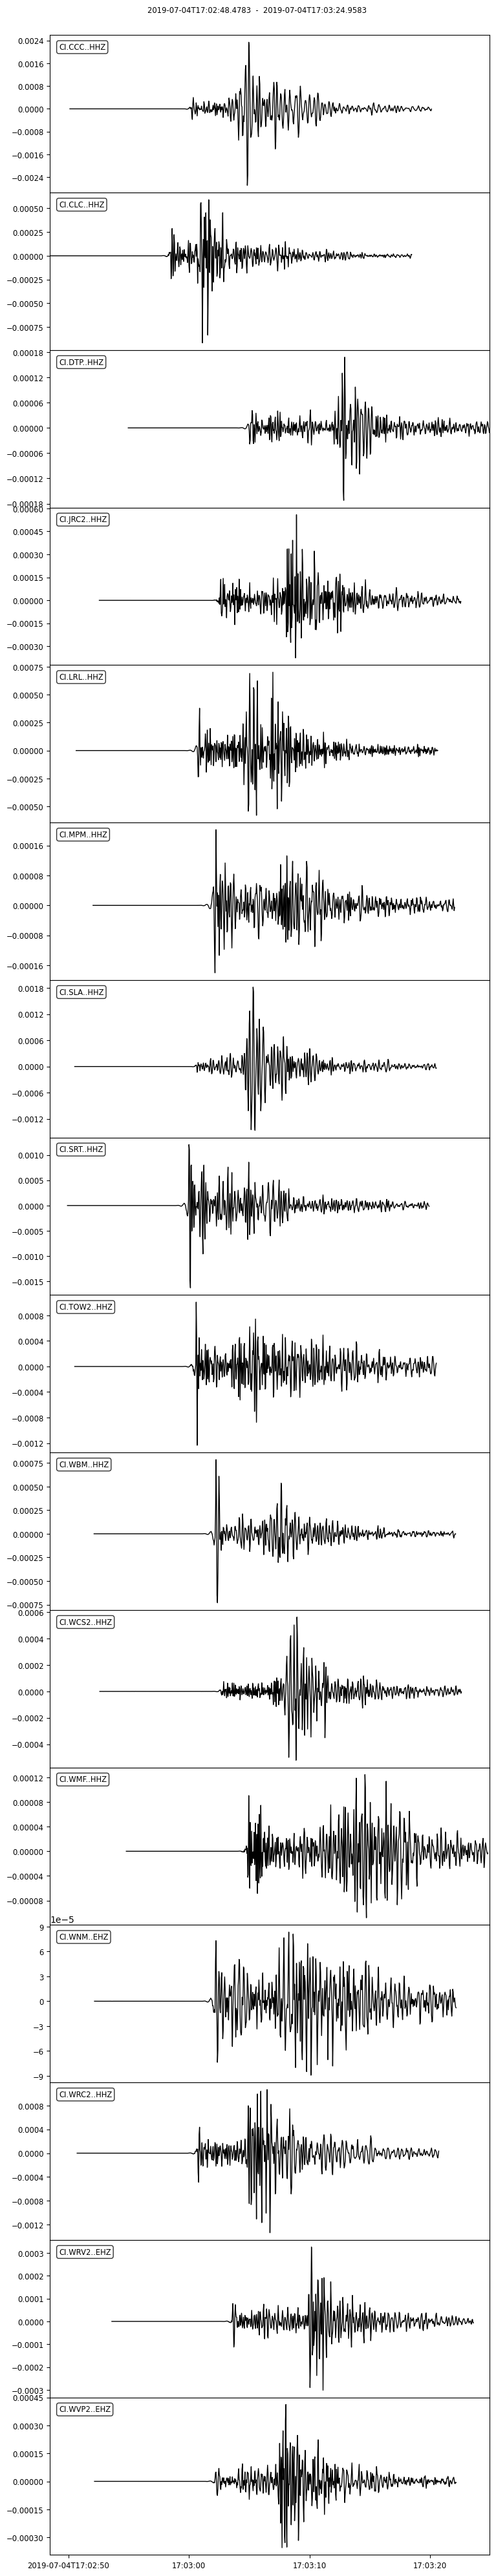

In [13]:
# plot them!
fig = event_waveforms.select(component="Z").plot(equal_scale=False)

## Run template matching

We will now use one of the events from the PhaseNet catalog as a **template** event to detect events with template matching.

In [14]:
selected_event_meta = event_meta.set_index("event_index").loc[EVENT_IDX]
selected_event_meta

time                        2019-07-04 17:02:55.057058245
adloc_score                                      0.770696
adloc_residual_time                              0.079675
num_picks                                              90
magnitude                                        4.476724
adloc_residual_amplitude                         0.143489
longitude                                     -117.495094
latitude                                        35.711607
depth_km                                        13.586411
Name: 1101, dtype: object

In [15]:
selected_event_picks = picks[picks["event_index"] == EVENT_IDX]
selected_event_picks

,station_id,phase_index,phase_time,phase_score,phase_type,dt_s,phase_polarity,phase_amplitude,event_index,sp_ratio,event_amplitude,adloc_mask,adloc_residual_time,adloc_residual_amplitude
565,CI.CLC..HN,6137848,2019-07-04 17:02:58.488,0.969,P,0.01,-0.879,-0.511873,1101,1.017569,2.474507e-07,1,-0.010048,-0.054426
566,CI.CLC..BH,6137847,2019-07-04 17:02:58.489,0.633,P,0.01,-0.324,-0.666956,1101,1.014822,2.022085e-07,1,0.048153,-0.127168
567,CI.CLC..HH,6137849,2019-07-04 17:02:58.498,0.965,P,0.01,-0.883,-0.586030,1101,1.086886,2.141392e-07,1,-0.007135,-0.236796
568,CI.SRT..HN,6137990,2019-07-04 17:02:59.908,0.879,P,0.01,0.699,-0.643401,1101,1.377537,4.387864e-07,1,-0.069463,0.065039
569,CI.SRT..HH,6137990,2019-07-04 17:02:59.908,0.891,P,0.01,0.734,-0.601019,1101,0.729745,5.910421e-07,1,-0.078144,0.020251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,CI.WMF..HH,6139185,2019-07-04 17:03:11.858,0.672,S,0.01,0.021,-1.368759,1101,1.096820,3.073536e-07,1,0.140179,-0.329117
651,CI.WMF..HN,6139189,2019-07-04 17:03:11.898,0.633,S,0.01,0.026,-1.371407,1101,0.989939,2.891483e-07,1,0.159858,-0.171350
652,CI.DTP..BH,6139200,2019-07-04 17:03:12.019,0.734,S,0.01,0.035,-1.322484,1101,1.385395,1.624267e-07,1,0.068940,0.175198
653,CI.DTP..HH,6139203,2019-07-04 17:03:12.038,0.707,S,0.01,-0.015,-1.306977,1101,1.122809,3.205840e-07,1,0.052824,0.125587


### Read data from same day

In [16]:
def fetch_day_waveforms(date, folder="preprocessed_2_12", dir_waveforms=DIR_WAVEFORMS):
    """
    Fetches the continuous seismograms for a given day.

    Parameters
    ----------
    date : str or pandas.Timestamp
        The date for which to fetch the continuous seismograms.
    folder : str, optional
        Folder name where the preprocessed continuous seismograms are stored, by default "preprocessed_2_12".
    dir_waveforms : str, optional
        Directory where the waveform data is stored, by default DIR_WAVEFORMS.

    Returns
    -------
    obspy.Stream
        Stream object containing the fetched continuous seismograms.
    """
    date = pd.Timestamp(date)
    # full path to waveform directory for this given day
    dir_data = os.path.join(dir_waveforms, date.strftime("%Y%m%d"), folder)
    stream = obs.Stream()
    files = glob.glob(os.path.join(dir_data, "*mseed"))
    for _file in files:
        stream += obs.read(_file)
    return stream

In [17]:
# first, read the continuous seismograms into an `obspy.Stream`
date = pd.Timestamp(selected_event_meta.time).strftime("%Y-%m-%d")
continuous_seismograms = fetch_day_waveforms(date)
print(continuous_seismograms.__str__(extended=True))

57 Trace(s) in Stream:
PB.B921..EHZ | 2019-07-03T23:59:59.998200Z - 2019-07-04T23:59:59.958200Z | 25.0 Hz, 2160000 samples
PB.B917..EHZ | 2019-07-03T23:59:59.998300Z - 2019-07-04T23:59:59.958300Z | 25.0 Hz, 2160000 samples
CI.JRC2..HHN | 2019-07-03T23:59:59.998300Z - 2019-07-04T23:59:59.958300Z | 25.0 Hz, 2160000 samples
CI.SRT..HHZ  | 2019-07-03T23:59:59.998300Z - 2019-07-04T23:59:59.958300Z | 25.0 Hz, 2160000 samples
CI.WCS2..HHE | 2019-07-03T23:59:59.998300Z - 2019-07-04T23:59:59.958300Z | 25.0 Hz, 2160000 samples
PB.B917..EH1 | 2019-07-03T23:59:59.998300Z - 2019-07-04T23:59:59.958300Z | 25.0 Hz, 2160000 samples
CI.MPM..HHZ  | 2019-07-03T23:59:59.998300Z - 2019-07-04T23:59:59.958300Z | 25.0 Hz, 2160000 samples
CI.MPM..HHE  | 2019-07-03T23:59:59.998300Z - 2019-07-04T23:59:59.958300Z | 25.0 Hz, 2160000 samples
CI.JRC2..HHE | 2019-07-03T23:59:59.998300Z - 2019-07-04T23:59:59.958300Z | 25.0 Hz, 2160000 samples
PB.B917..EH2 | 2019-07-03T23:59:59.998300Z - 2019-07-04T23:59:59.958300Z | 25

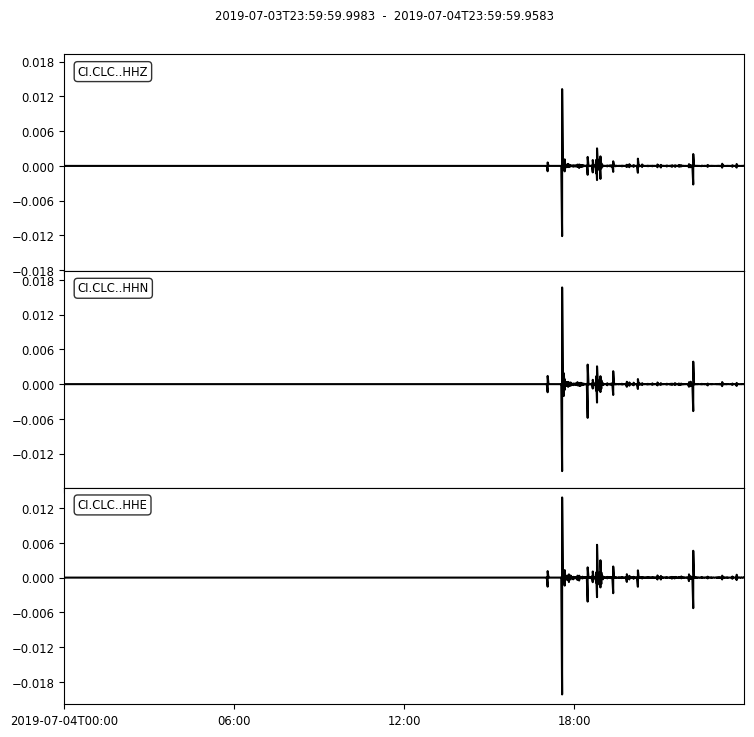

In [18]:
# plot the continuous seismograms from a single station
fig = continuous_seismograms.select(station="CLC").plot()

In [19]:
# then, cast data into `numpy.ndarray`
station_codes = list(set([st.stats.station for st in continuous_seismograms]))
component_codes = ["N", "E", "Z"]
component_aliases={"E": ["E", "2"], "N": ["N", "1"], "Z": ["Z"]}

num_stations = len(station_codes)
num_channels = len(component_codes)
num_samples = len(continuous_seismograms[0].data)

continuous_seismograms_arr = np.zeros((num_stations, num_channels, num_samples), dtype=np.float32)
for s, sta in enumerate(station_codes):
    for c, cp in enumerate(component_codes):
        for cp_alias in component_aliases[cp]:
            sel_seismogram = continuous_seismograms.select(station=sta, component=cp_alias)
            if len(sel_seismogram) > 0:
                continuous_seismograms_arr[s, c, :] = sel_seismogram[0].data
                break
            
continuous_seismograms_arr


array([[[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 1.8492177e-11,  7.3153331e-11,  1.3191939e-10, ...,
          4.4108817e-10, -3.0806005e-10, -4.0270010e-10]],

       [[ 4.0964762e-12,  1.3559599e-11,  1.6101020e-11, ...,
          1.8798997e-10,  5.8193428e-10,  1.5926621e-11],
        [ 8.8505540e-12,  1.4108006e-11,  2.2935031e-12, ...,
         -1.2229077e-10,  4.8499909e-11,  1.0244472e-10],
        [-1.4492193e-11, -8.8319754e-13,  5.9479423e-13, ...,
          3.6106751e-10,  1.6119951e-10, -2.9384392e-10]],

       [[-1.6893502e-11,  8.4201196e-12,  2.7799072e-11, ...,
         -1.7474208e-10, -4.5014548e-11, -2.6048433e-10],
        [ 1.4196522e-11,  3.8935088e-12, -2.4043532e-12, ...,
         -4.9603099e-11, -9.2666923e-11,  2.2229388e-10],
        [-7.8133723e-12,  1.1610854e

### Build template 

#### ------------------ Background ------------------

A template is a collection of waveforms at different channels, $T_{s,c}(t)$, which are clips taken from the continuous seismograms, $u_{s,c}$. These clips are taken at times defined by:
$$ u_{s,c}(t)\ |\ t \in \lbrace \tau_{s,c}; \tau_{s,c} + D \rbrace, $$
where $\tau_{s,c}$ is the start time of the template window and $D$ is the template duration.

$\tau_{s,c}$ is given by some prior information on the event: picks or modeled arrival times. The **moveouts**, $\tilde{\tau}_{s,c}$, are the collection of delay times relative to the earliest $\tau_{s,c}$:
$$ \tilde{\tau}_{s,c} = \tau_{s,c} - \underset{s,c}{\min} \lbrace \tau_{s,c} \rbrace .$$

#### ------------------ On the necessity to clip template waveforms out of `numpy.ndarray` instead of `obspy.Stream` ------------------

Looking carefully at the output of `print(continuous_seismograms.__str__(extended=True))`, a few cells before, we see that start times are generally not exactly at midnight. This is a consequence of the discrete nature of the continuous seismograms (here, sampled at 25 samples per second). Thus, in general, the $\tau_{s,c}$ computed from picks or modeled arrival times fall in between two samples of the seismograms.

When running a matched-filter search, we need to make sure the moveouts, $\tilde{\tau}_{s,c}$, ultimately expressed in samples, match exactly the times that were used when clipping the template waveforms out of $u_{s,c}$. One way to ensure this is to first cast the $\tau_{s,c}$ to times in samples and then operate exclusively on the `numpy.ndarray`: `continuous_seismograms_arr`:

$$ T_{s,c}[t_n] = u_{s,c}[\tau_{s,c} + n \Delta t],$$
where $\Delta t$ is the sampling time.

#### Clip out waveforms and moveout and station-weight arrays

In [20]:
# PHASE_ON_COMP: dictionary defining which moveout we use to extract the waveform.
#                Here, we use windows centered around the S wave for horizontal components
#                and windows starting 1sec before the P wave for the vertical component.
PHASE_ON_COMP = {"N": "S", "E": "S", "Z": "P"}
# OFFSET_PHASE_SEC: dictionary defining the time offset taken before a given phase
#               for example OFFSET_PHASE_SEC["P"] = 1.0 means that we extract the window
#               1 second before the predicted P arrival time
OFFSET_PHASE_SEC = {"P": 1.0, "S": 4.0}
# TEMPLATE_DURATION_SEC
TEMPLATE_DURATION_SEC = 8. 
# SAMPLING_RATE_HZ
SAMPLING_RATE_HZ = 25.
# TEMPLATE_DURATION_SAMP
TEMPLATE_DURATION_SAMP = int(TEMPLATE_DURATION_SEC * SAMPLING_RATE_HZ)


In [21]:
# add station_code columns to `selected_event_picks`
selected_event_picks.set_index("station_id", inplace=True)
for staid in selected_event_picks.index:
    station_code = staid.split(".")[1]
    selected_event_picks.loc[staid, "station_code"] = station_code
selected_event_picks

/tmp/ipykernel_2629457/1881751651.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_event_picks.loc[staid, "station_code"] = station_code


,phase_index,phase_time,phase_score,phase_type,dt_s,phase_polarity,phase_amplitude,event_index,sp_ratio,event_amplitude,adloc_mask,adloc_residual_time,adloc_residual_amplitude,station_code
station_id,,,,,,,,,,,,,,
CI.CLC..HN,6137848,2019-07-04 17:02:58.488,0.969,P,0.01,-0.879,-0.511873,1101,1.017569,2.474507e-07,1,-0.010048,-0.054426,CLC
CI.CLC..BH,6137847,2019-07-04 17:02:58.489,0.633,P,0.01,-0.324,-0.666956,1101,1.014822,2.022085e-07,1,0.048153,-0.127168,CLC
CI.CLC..HH,6137849,2019-07-04 17:02:58.498,0.965,P,0.01,-0.883,-0.586030,1101,1.086886,2.141392e-07,1,-0.007135,-0.236796,CLC
CI.SRT..HN,6137990,2019-07-04 17:02:59.908,0.879,P,0.01,0.699,-0.643401,1101,1.377537,4.387864e-07,1,-0.069463,0.065039,SRT
CI.SRT..HH,6137990,2019-07-04 17:02:59.908,0.891,P,0.01,0.734,-0.601019,1101,0.729745,5.910421e-07,1,-0.078144,0.020251,SRT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CI.WMF..HH,6139185,2019-07-04 17:03:11.858,0.672,S,0.01,0.021,-1.368759,1101,1.096820,3.073536e-07,1,0.140179,-0.329117,WMF
CI.WMF..HN,6139189,2019-07-04 17:03:11.898,0.633,S,0.01,0.026,-1.371407,1101,0.989939,2.891483e-07,1,0.159858,-0.171350,WMF
CI.DTP..BH,6139200,2019-07-04 17:03:12.019,0.734,S,0.01,0.035,-1.322484,1101,1.385395,1.624267e-07,1,0.068940,0.175198,DTP


In the following cell, we build the `numpy.ndarray` of moveouts $\tilde{\tau}_{s,c}$, expressed in units of samples.

In [22]:
# first, we extract the set of relative delay times of the beginning of each
# template window on a given station and component
tau_s_c_sec = np.zeros((num_stations, num_channels), dtype=np.float64)
for s, sta in enumerate(station_codes):
    for c, cp in enumerate(component_codes):
        phase_type = PHASE_ON_COMP[cp]
        picks_s_c = selected_event_picks[
            (
                (selected_event_picks["station_code"] == sta)
                & (selected_event_picks["phase_type"] == phase_type)
            )
        ]
        if len(picks_s_c) == 0:
            # no pick for this station/component: set to -999
            tau_s_c_sec[s, c] = -999
        elif len(picks_s_c) == 1:
            # express pick relative to beginning of day (midnight)
            _pick = pd.Timestamp(picks_s_c["phase_time"])
            _relative_pick_sec = (_pick - pd.Timestamp(_pick.strftime("%Y-%m-%d"))).total_seconds()
            tau_s_c_sec[s, c] = _relative_pick_sec - OFFSET_PHASE_SEC[phase_type]
        else:
            # there were several picks from different channels: average them
            _relative_pick_sec = 0.
            for _pick in picks_s_c["phase_time"].values:
                _pick = pd.Timestamp(_pick)
                _relative_pick_sec += (_pick - pd.Timestamp(_pick.strftime("%Y-%m-%d"))).total_seconds()
            _relative_pick_sec /= float(len(picks_s_c["phase_time"]))
            tau_s_c_sec[s, c] = _relative_pick_sec - OFFSET_PHASE_SEC[phase_type]
# now, we convert these relative times into samples 
# and express them relative to the earliest time
# we also store in memory the minimum time offset `tau_min_samp` for the next step
moveouts_samp_arr = (tau_s_c_sec * SAMPLING_RATE_HZ).astype(np.int64)
tau_min_samp = np.min(moveouts_samp_arr[moveouts_samp_arr > 0])
moveouts_samp_arr = moveouts_samp_arr - tau_min_samp
moveouts_samp_arr

array([[     160,      160,      105],
       [-1559399, -1559399, -1559399],
       [-1559399, -1559399, -1559399],
       [      94,       94,       66],
       [     225,      225,      140],
       [     165,      165,      105],
       [     175,      175,      115],
       [     179,      179,      116],
       [-1559399, -1559399, -1559399],
       [     101,      101,       68],
       [      72,       72,       48],
       [-1559399, -1559399, -1559399],
       [      91,       91,       62],
       [       0,        0,       13],
       [-1559399, -1559399, -1559399],
       [      78,       78,       53],
       [     102,      102,       64],
       [     272,      272,      171],
       [     156,      156,      104],
       [     159,      159,      102],
       [     277,      277,      174]])

Next, we use the moveouts, in samples, to clip out the relevant template waveforms from the continuous seismograms.

In [23]:
template_waveforms_arr = np.zeros((num_stations, num_channels, TEMPLATE_DURATION_SAMP), dtype=np.float32)
weights_arr = np.ones((num_stations, num_channels), dtype=np.float32)

for s, sta in enumerate(station_codes):
    for c, cp in enumerate(component_codes):
        if moveouts_samp_arr[s, c] < 0:
            # no picks were found on this station
            weights_arr[s, c] = 0.
            continue
        starttime = tau_min_samp + moveouts_samp_arr[s, c]
        endtime = starttime + TEMPLATE_DURATION_SAMP
        template_waveforms_arr[s, c, :] = continuous_seismograms_arr[s, c, starttime:endtime]
        if template_waveforms_arr[s, c, :].sum() == 0.:
            # no data was available on this channel
            weights_arr[s, c] = 0.
        
template_waveforms_arr

array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.27826226e-07,  1.54385773e-07,  1.52002073e-07, ...,
          1.35540016e-04, -3.16935242e-04, -1.91862506e-04]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.000

In [24]:
# normalize template waveforms for numerical reasons
norm = np.std(template_waveforms_arr, axis=-1, keepdims=True)
norm[norm == 0.] = 1. 
template_waveforms_arr /= norm

# normalize weights so that they sum up to one
weights_arr /= np.sum(weights_arr)

# normalize continuous seismograms for numerical reasons
norm = np.std(continuous_seismograms_arr, axis=-1, keepdims=True)
norm[norm == 0.] = 1. 
continuous_seismograms_arr /= norm

### Run FMF

After all this data formatting, we can now run template matching (also called matched-filtering) to detect new events that are similar to our template event.

For that, use the software Fast Matched Filter (FMF): [https://github.com/beridel/fast_matched_filter](https://github.com/beridel/fast_matched_filter)

FMF offers C and CUDA-C routines to efficiently run template matching on CPUs, or even on GPUs if available to you.

In [25]:
# FMF_STEP_SAMP: this is the step between two consecutive calculation of the correlation coefficient
FMF_STEP_SAMP = 1
# ARCH: it determines whether you want to use GPUs or CPUs 
#       If you do not have an Nvidia GPU, set ARCH = "cpu"
ARCH = "gpu"

In [26]:
cc = fmf.matched_filter(
    template_waveforms_arr.astype(np.float32),
    moveouts_samp_arr.astype(np.int32),
    weights_arr.astype(np.float32),
    continuous_seismograms_arr.astype(np.float32),
    FMF_STEP_SAMP,
    arch=ARCH,
)

In [27]:
# FMF is programmed to handle multiple templates at once. Here, we only used
# a single template, hence the size of the outermost axis of "1"
cc.shape

(1, 2159801)

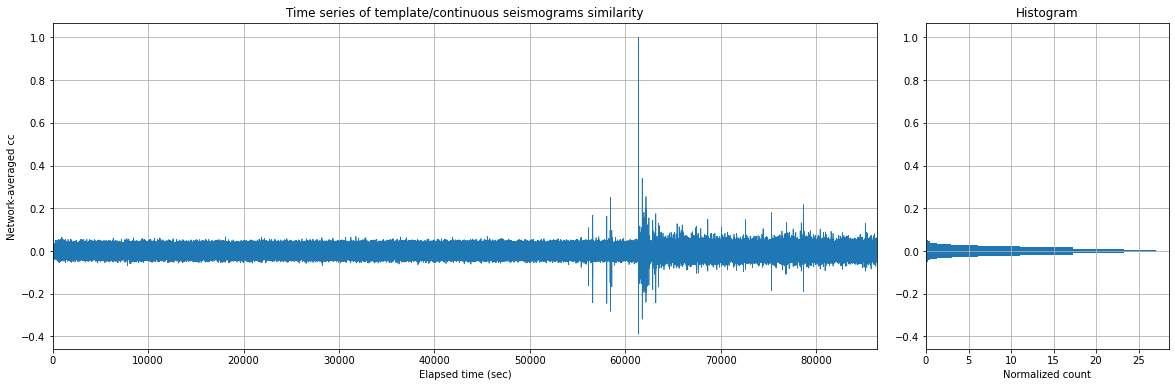

In [28]:
# let's print the output of our template matching run, which a time series of network-averaged correlation coefficients
# of same duration as the continuous seismograms
_cc = cc[0, :]
time_cc = np.arange(len(_cc)) / SAMPLING_RATE_HZ

fig = plt.figure("network_averaged_cc", figsize=(20, 6))
gs = fig.add_gridspec(ncols=4)

ax1 = fig.add_subplot(gs[:3])
ax1.plot(time_cc, _cc, lw=0.75)
ax1.set_xlabel("Elapsed time (sec)")
ax1.set_ylabel("Network-averaged cc")
ax1.set_xlim(time_cc.min(), time_cc.max())
ax1.set_title("Time series of template/continuous seismograms similarity")

ax2 = fig.add_subplot(gs[3], sharey=ax1)
_ = ax2.hist(_cc, orientation="horizontal", bins=250, density=True)
ax2.set_xlabel("Normalized count")
ax2.set_title("Histogram")

for ax in [ax1, ax2]:
    ax.grid()


### Set detection threshold and find events

We will use the time series of correlation coefficients to build an earthquake catalog. For that, we need to set a detection threshold and define all times above that threshold as triggers caused by near-repeats of the template event.

In [29]:
def select_cc_indexes(
    cc_t,
    threshold,
    search_win,
):
    """Select the peaks in the CC time series.

    Parameters
    ------------
    cc_t: (n_corr,) numpy.ndarray
        The CC time series for one template.
    threshold: (n_corr,) numpy.ndarray or scalar
        The detection threshold.
    search_win: scalar int
        The minimum inter-event time, in units of correlation step.


    Returns
    --------
    cc_idx: (n_detections,) numpy.ndarray
        The list of all selected CC indexes. They give the timings of the
        detected events.
    """

    cc_detections = cc_t > threshold
    cc_idx = np.where(cc_detections)[0]

    cc_idx = list(cc_idx)
    n_rm = 0
    for i in range(1, len(cc_idx)):
        if (cc_idx[i - n_rm] - cc_idx[i - n_rm - 1]) < search_win:
            if cc_t[cc_idx[i - n_rm]] > cc_t[cc_idx[i - n_rm - 1]]:
                # keep (i-n_rm)-th detection
                cc_idx.remove(cc_idx[i - n_rm - 1])
            else:
                # keep (i-n_rm-1)-th detection
                cc_idx.remove(cc_idx[i - n_rm])
            n_rm += 1
    cc_idx = np.asarray(cc_idx)
    return cc_idx
    

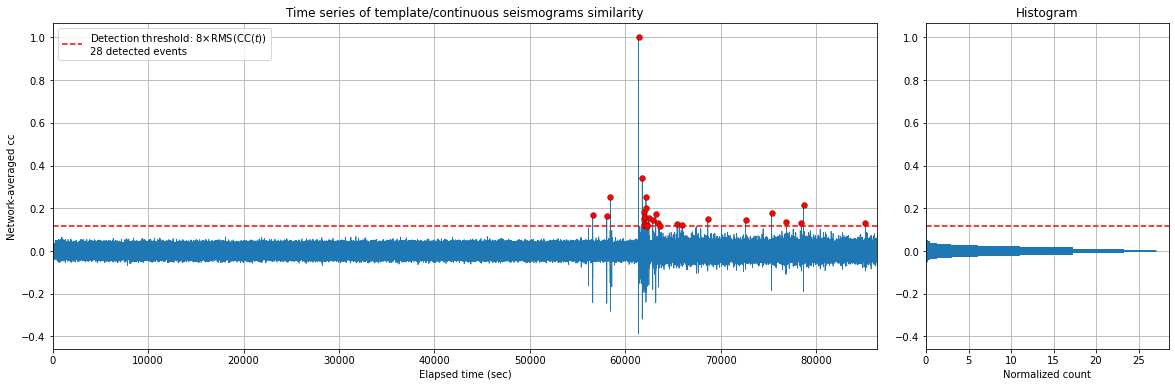

In [30]:
# INTEREVENT_TIME_RESOLUTION_SEC: In some cases, a template might trigger multiple, closely spaced detections because
#                                 of a phenomenon similar to that of "cycle skipping", where the waveform correlates
#                                 well with a time-shifted version of itself. Thus, to avoid redundant detections, we
#                                 set a minimum time separation between triggers (rule of thumb: about half the template duration)
INTEREVENT_TIME_RESOLUTION_SEC = 5.
INTEREVENT_TIME_RESOLUTION_SAMP = int(INTEREVENT_TIME_RESOLUTION_SEC * SAMPLING_RATE_HZ)
_cc = cc[0, :]
time_cc = np.arange(len(_cc)) * FMF_STEP_SAMP / SAMPLING_RATE_HZ
NUM_RMS = 8.
detection_threshold = NUM_RMS * np.std(_cc)
event_cc_indexes = select_cc_indexes(_cc, detection_threshold, INTEREVENT_TIME_RESOLUTION_SAMP)

fig = plt.figure("network_averaged_cc", figsize=(20, 6))
gs = fig.add_gridspec(ncols=4)

ax1 = fig.add_subplot(gs[:3])
ax1.plot(time_cc, _cc, lw=0.75)
ax1.scatter(time_cc[event_cc_indexes], _cc[event_cc_indexes], linewidths=0.25, edgecolor="k", color="r", zorder=2)
ax1.set_xlabel("Elapsed time (sec)")
ax1.set_ylabel("Network-averaged cc")
ax1.set_xlim(time_cc.min(), time_cc.max())
ax1.set_title("Time series of template/continuous seismograms similarity")

ax2 = fig.add_subplot(gs[3], sharey=ax1)
_ = ax2.hist(_cc, orientation="horizontal", bins=250, density=True, zorder=2)
ax2.set_xlabel("Normalized count")
ax2.set_title("Histogram")

label = f"Detection threshold: {NUM_RMS:.0f}"r"$\times \mathrm{RMS}(\mathrm{CC}(t))$"f"\n{len(event_cc_indexes):d} detected events"
for ax in [ax1, ax2]:
    ax.grid()
    ax.axhline(
        detection_threshold, ls="--", color="r",
        label=label
        )
ax1.legend(loc="upper left")

Use the trigger times to build the earthquake catalog and extract event waveforms on a given station/component.

In [31]:
STATION_NAME = "CLC"
COMPONENT_NAME = "Z"

sta_idx = station_codes.index(STATION_NAME)
cp_idx = component_codes.index(COMPONENT_NAME)

catalog = {
    "detection_time": [],
    "peak_amplitude": [],
    "cc": [],
    "normalized_cc": []
}

detected_event_waveforms = []
for i in range(len(event_cc_indexes)):
    idx_start = event_cc_indexes[i] * FMF_STEP_SAMP + moveouts_samp_arr[sta_idx, cp_idx]
    idx_end = idx_start + TEMPLATE_DURATION_SAMP
    detected_event_waveforms.append(continuous_seismograms_arr[sta_idx, cp_idx, idx_start:idx_end])
    # --------------------------------------
    detection_time = pd.Timestamp(date) + pd.Timedelta(event_cc_indexes[i] * FMF_STEP_SAMP / SAMPLING_RATE_HZ, "s")
    cc = _cc[event_cc_indexes[i]]
    normalized_cc = cc / detection_threshold
    peak_amplitude = np.abs(detected_event_waveforms[-1]).max()
    catalog["detection_time"].append(detection_time)
    catalog["peak_amplitude"].append(peak_amplitude)
    catalog["cc"].append(cc)
    catalog["normalized_cc"].append(normalized_cc)
detected_event_waveforms = np.asarray(detected_event_waveforms)
catalog = pd.DataFrame(catalog)
catalog

,detection_time,peak_amplitude,cc,normalized_cc
0,2019-07-04 15:42:49.840,0.003044,0.167660,1.426171
1,2019-07-04 16:07:21.880,0.002178,0.162098,1.378857
2,2019-07-04 16:13:44.960,0.035267,0.252016,2.143727
3,2019-07-04 17:02:56.960,16.214684,1.000000,8.506307
4,2019-07-04 17:09:21.680,0.155795,0.339568,2.888470
5,2019-07-04 17:11:41.320,0.006684,0.120572,1.025621
6,2019-07-04 17:12:16.520,0.116193,0.181086,1.540373
7,2019-07-04 17:12:39.680,0.030746,0.150769,1.282485
8,2019-07-04 17:13:28.560,0.001898,0.156879,1.334461
9,2019-07-04 17:13:53.480,0.003748,0.125633,1.068674


### Plot some waveforms

When building a catalog, it is **always** necessary to visualize some of the detected event waveforms to get a sense of the ratio of true-to-false detection rate.

In the following, we plot the waveforms of each detected event and we also compare the stack of all the waveforms to the original template waveform. Since all events share similar waveforms, the stack is similar to the template waveform. Moreover, since noise across all these waveforms sums up incoherently, stacking acts as a denoiser which may help you produce a cleaner version of the template waveform, for example on remote stations.

Text(0, 0.5, 'Normalized amplitude')

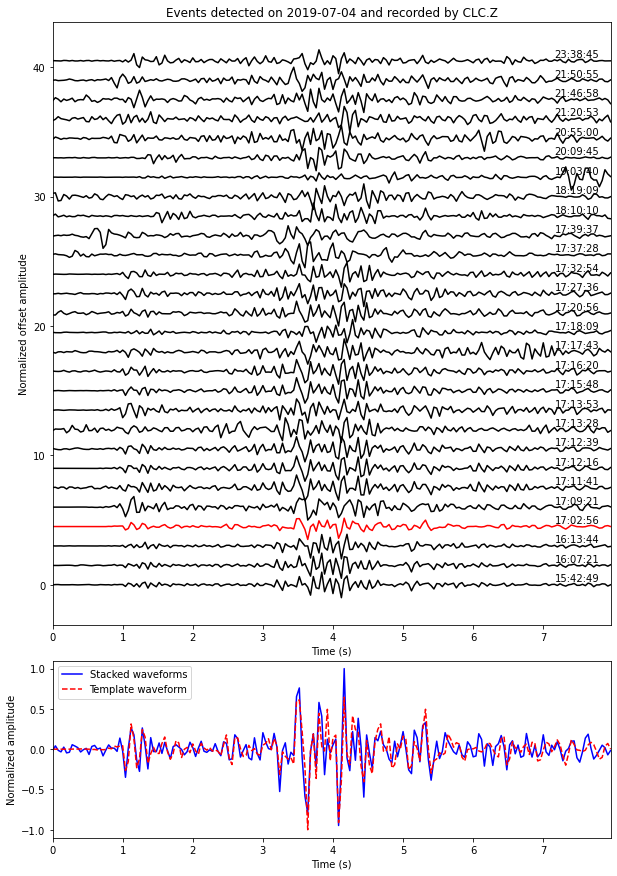

In [32]:
fig = plt.figure("detected_event_waveforms", figsize=(10, 15))
gs = fig.add_gridspec(nrows=4)

ax1 = fig.add_subplot(gs[:3])

_time_wav = np.arange(detected_event_waveforms.shape[1]) / SAMPLING_RATE_HZ

stack = np.zeros(detected_event_waveforms.shape[1])
for i in range(detected_event_waveforms.shape[0]):
    norm = np.abs(detected_event_waveforms[i, :]).max()
    if catalog["cc"].iloc[i] > 0.999:
        color = "r"
        template_wav = detected_event_waveforms[i, :] / norm
    else:
        color = "k"
    time_of_day = catalog["detection_time"].iloc[i].strftime("%H:%M:%S")
    ax1.plot(_time_wav, detected_event_waveforms[i, :] / norm + i * 1.5, color=color)
    ax1.text(0.98 * _time_wav.max(), i * 1.5 + 0.1, time_of_day, ha="right", va="bottom")
    stack += detected_event_waveforms[i, :] / norm
stack /= np.abs(stack).max()
ax1.set_xlabel("Time (s)")
ax1.set_xlim(_time_wav.min(), _time_wav.max())
ax1.set_ylabel("Normalized offset amplitude")
ax1.set_title(f"Events detected on {date} and recorded by {STATION_NAME}.{COMPONENT_NAME}")

ax2 = fig.add_subplot(gs[3], sharex=ax1)
ax2.plot(_time_wav, stack, color="blue", label="Stacked waveforms")
ax2.plot(_time_wav, template_wav, color="red", ls="--", label="Template waveform")
ax2.legend(loc="upper left")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Normalized amplitude")

## Plot template return time vs detection time

In [33]:
catalog["return_time_s"] = catalog["detection_time"].diff().dt.total_seconds()
catalog

,detection_time,peak_amplitude,cc,normalized_cc,return_time_s
0,2019-07-04 15:42:49.840,0.003044,0.167660,1.426171,NaN
1,2019-07-04 16:07:21.880,0.002178,0.162098,1.378857,1472.04
2,2019-07-04 16:13:44.960,0.035267,0.252016,2.143727,383.08
3,2019-07-04 17:02:56.960,16.214684,1.000000,8.506307,2952.00
4,2019-07-04 17:09:21.680,0.155795,0.339568,2.888470,384.72
5,2019-07-04 17:11:41.320,0.006684,0.120572,1.025621,139.64
6,2019-07-04 17:12:16.520,0.116193,0.181086,1.540373,35.20
7,2019-07-04 17:12:39.680,0.030746,0.150769,1.282485,23.16
8,2019-07-04 17:13:28.560,0.001898,0.156879,1.334461,48.88
9,2019-07-04 17:13:53.480,0.003748,0.125633,1.068674,24.92


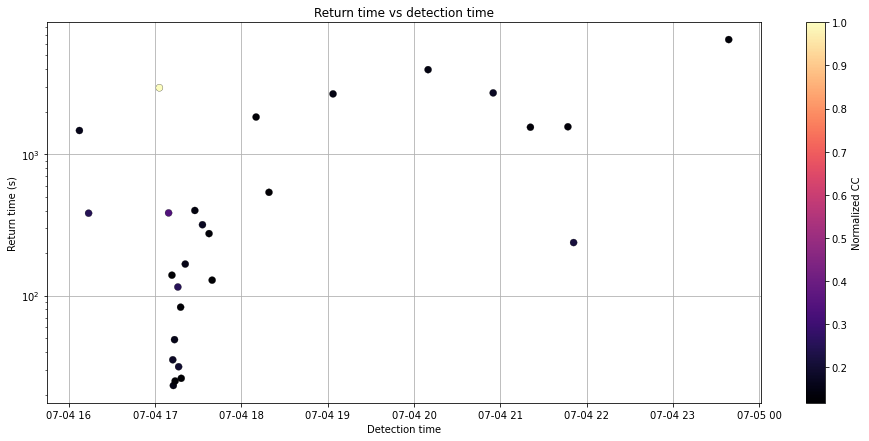

In [39]:
fig, ax = plt.subplots(num="return_time_vs_detection_time", figsize=(16, 7))

ax.scatter(catalog["detection_time"], catalog["return_time_s"], c=catalog["cc"], linewidths=0.25, edgecolor="k", cmap="magma", s=50)
ax.set_xlabel("Detection time")
ax.set_ylabel("Return time (s)")
ax.set_title("Return time vs detection time")
ax.grid()
cbar = plt.colorbar(ax.collections[0], ax=ax)
cbar.set_label("Normalized CC")
ax.set_yscale("log")